In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, precision_score,\
                            confusion_matrix, mean_absolute_error, mean_squared_error, r2_score,\
                            explained_variance_score
from scipy import stats

import warnings
warnings.simplefilter('ignore')
%matplotlib inline


In [2]:
df = pd.read_csv('test.csv')
df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [3]:
df.shape

(1000, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
id               1000 non-null int64
battery_power    1000 non-null int64
blue             1000 non-null int64
clock_speed      1000 non-null float64
dual_sim         1000 non-null int64
fc               1000 non-null int64
four_g           1000 non-null int64
int_memory       1000 non-null int64
m_dep            1000 non-null float64
mobile_wt        1000 non-null int64
n_cores          1000 non-null int64
pc               1000 non-null int64
px_height        1000 non-null int64
px_width         1000 non-null int64
ram              1000 non-null int64
sc_h             1000 non-null int64
sc_w             1000 non-null int64
talk_time        1000 non-null int64
three_g          1000 non-null int64
touch_screen     1000 non-null int64
wifi             1000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 164.1 KB


In [5]:
df['battery_power'].unique()
df.__delitem__('id')

In [6]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,4.328000,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,2.288155,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,1.000000,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,2.000000,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,4.000000,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,6.000000,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,8.000000,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0D5F0890>,
      dtype=object)

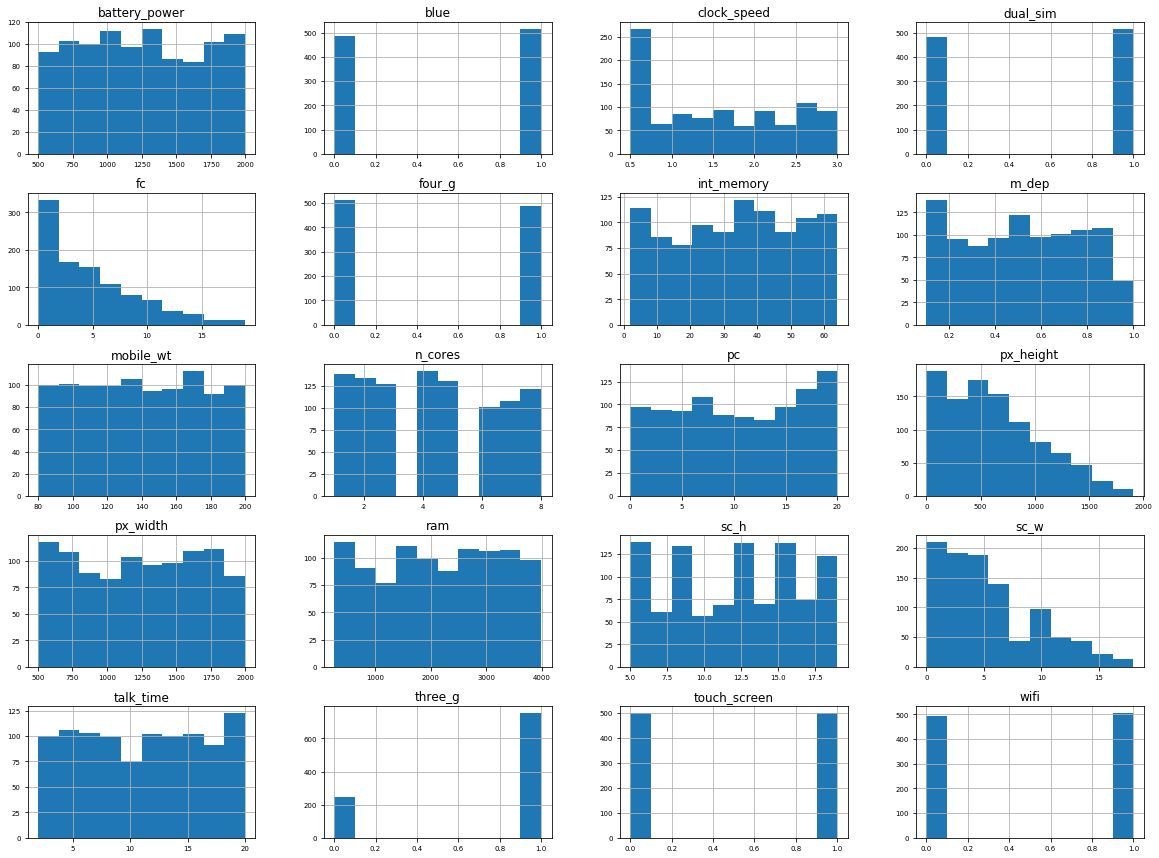

In [7]:
df.hist(figsize=(20, 15), xlabelsize=7, ylabelsize=7)

In [8]:
df_nonbinary = pd.get_dummies(df['battery_power'])
print (df_nonbinary.columns)

Int64Index([ 500,  504,  507,  510,  511,  517,  518,  519,  520,  521,
            ...
            1986, 1988, 1989, 1991, 1992, 1995, 1996, 1997, 1998, 1999],
           dtype='int64', length=721)


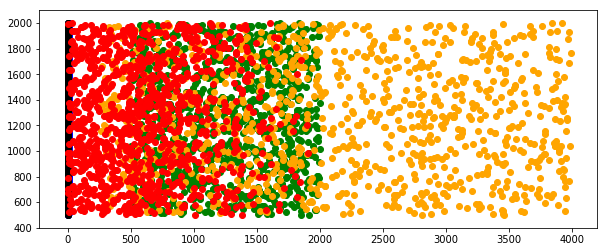

In [9]:
f, ax = plt.subplots(figsize=(10,4))
plt.scatter(y=df['battery_power'],x=df['px_width'],color='Green')
plt.scatter(y=df['battery_power'],x=df['n_cores'],color='blue')
plt.scatter(y=df['battery_power'],x=df['ram'],color='orange')
plt.scatter(y=df['battery_power'],x=df['clock_speed'],color='black')
plt.scatter(y=df['battery_power'],x=df['px_height'],color='red')




In [10]:
data_class = df.drop('battery_power',axis=1)
target_class = df['battery_power']>df['battery_power'].mean()
target_class = target_class.apply(int)

In [11]:
def IG(target, index, criterion):
    s_0 = criterion(target)
    s_1 = criterion(target[:index])
    s_2 = criterion(target[index+1:])
    ig = s_0 - len(target[:index])/len(target)*s_1 - len(target[index+1:])/len(target)*s_2  
    return ig
def gini(data):    
    p = data.sum()[1]/len(data)    
    return 1-p**2-(1-p)**2
def entropy(data):
    p = data.sum()[1]/len(data)    
    if p==0 or p==1:
        return 0    
    return -p*np.log2(p) - (1-p)*np.log2(1-p)

In [12]:
name_features = ['px_width','n_cores','ram','px_height']
name_target = 'battery_power'

In [13]:
%%time
def tree_split(data, features, target, criterion):    
    title_plot = ''    
    if criterion == 'entropy':        
        title_plot = criterion
        criterion = entropy
    else:
        title_plot = criterion
        criterion = gini
    
    best_ig = 0
    best_index = 0
    best_feature = ''
    
    for feature in features:        
        ig_by_feature = []        
        for i in range(1, len(data)-1):            
            target_sort_by_feature = data[[feature, target]].sort_values(feature)
            ig = IG(target_sort_by_feature, i, criterion)                        
            ig_by_feature.append(ig)
            
            if ig > best_ig:
                best_ig = ig
                best_index = i
                best_feature = feature
        
        plt.plot(range(len(data) - 2), np.array(ig_by_feature))
        plt.legend(features)
        plt.title(title_plot)
        plt.xlabel('index_value_feature')
        plt.ylabel('information gain')
        plt.grid(True)       
    
    print('Best feature to split:', best_feature)    
    print('Value best feature to split:', data[best_feature][best_index])
    print('Best information gain', round(best_ig,3))

Wall time: 0 ns


Best feature to split: px_width
Value best feature to split: 1408
Best information gain 0.006


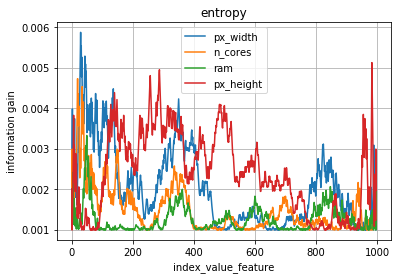

In [14]:
tree_split(data_class[name_features].join(target_class), name_features, name_target, 'entropy')

Best feature to split: px_width
Value best feature to split: 1408
Best information gain 0.004


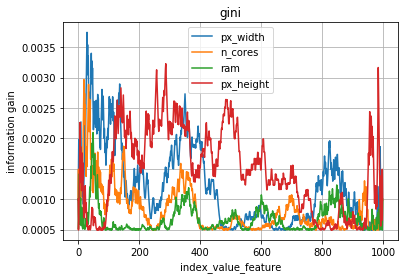

In [15]:
tree_split(data_class[name_features].join(target_class), name_features, name_target, 'gini')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data_class,
                                                    target_class,
                                                    test_size = 0.2,
                                                    random_state=8,
                                                    shuffle=True)

In [17]:
tree = DecisionTreeClassifier(random_state=43)

In [18]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=43,
            splitter='best')

In [19]:
y_pred = tree.predict(X_test)

In [20]:
accuracy_score(y_test, y_pred)

0.555

In [21]:
tree_params = {'max_depth':np.arange(3,15)}

In [22]:
tree = DecisionTreeClassifier(random_state=43)

In [23]:
tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1)

In [24]:
tree_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=43,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [25]:
tree_grid.best_score_, tree_grid.best_params_

(0.53625, {'max_depth': 7})

In [26]:
pred_tree_gridcv = tree_grid.best_estimator_.predict(X_test)

In [27]:
accuracy_score(y_test, pred_tree_gridcv)

0.545

In [28]:

from ipywidgets import Image
from io import StringIO
import pydot 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree_grid.best_estimator_,feature_names=data_class.columns, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [29]:
for i, feat in enumerate(data_class.columns):
    if tree_grid.best_estimator_.feature_importances_[i] >= 0.05:
        print(feat, tree_grid.best_estimator_.feature_importances_[i])

clock_speed 0.05039432045267702
int_memory 0.10142108923373785
m_dep 0.060188644186612156
mobile_wt 0.08861752991314588
px_height 0.17454931713118377
px_width 0.12766035308321647
ram 0.10170213040326342
sc_h 0.08387287388056379
